In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from DataPrep.load_data import load_data
import pyforest

In [8]:
df = load_data()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

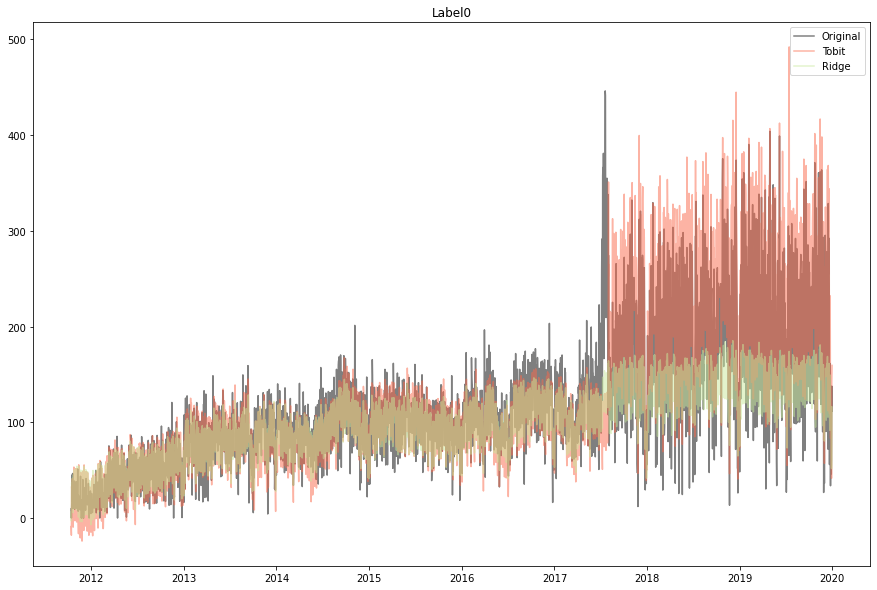

r^2 score: 0.6789554223970755


<IPython.core.display.Javascript object>

RMSE: 40.824564852511166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

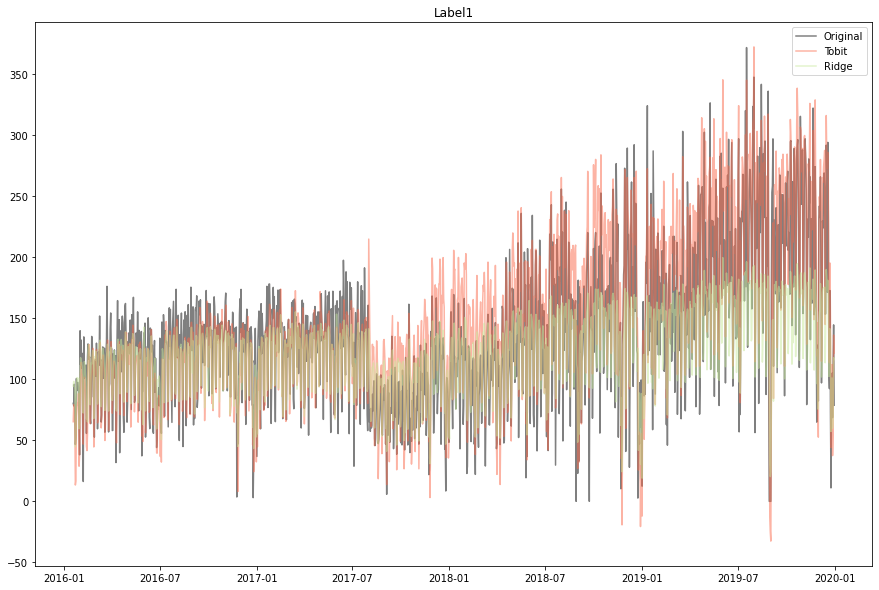

r^2 score: 0.6632790331837435


<IPython.core.display.Javascript object>

RMSE: 35.47473888930996


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

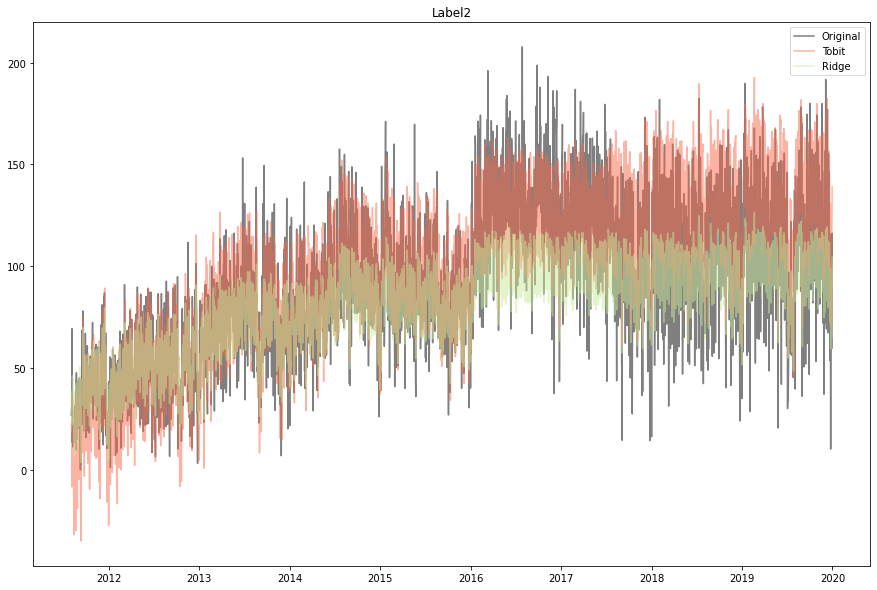

r^2 score: 0.44713312525336324


<IPython.core.display.Javascript object>

RMSE: 27.709816573647746


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

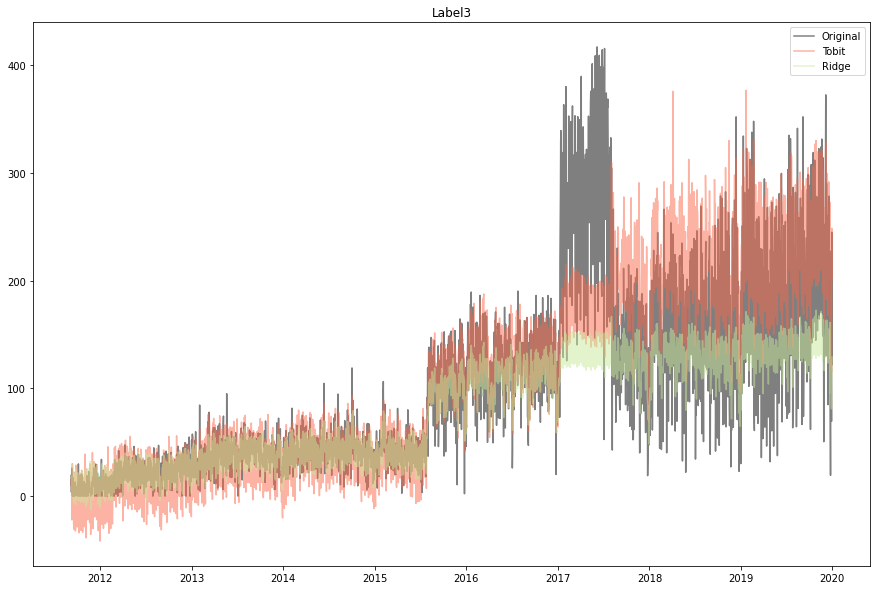

r^2 score: 0.6534795788256793


<IPython.core.display.Javascript object>

RMSE: 51.735599358374536


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

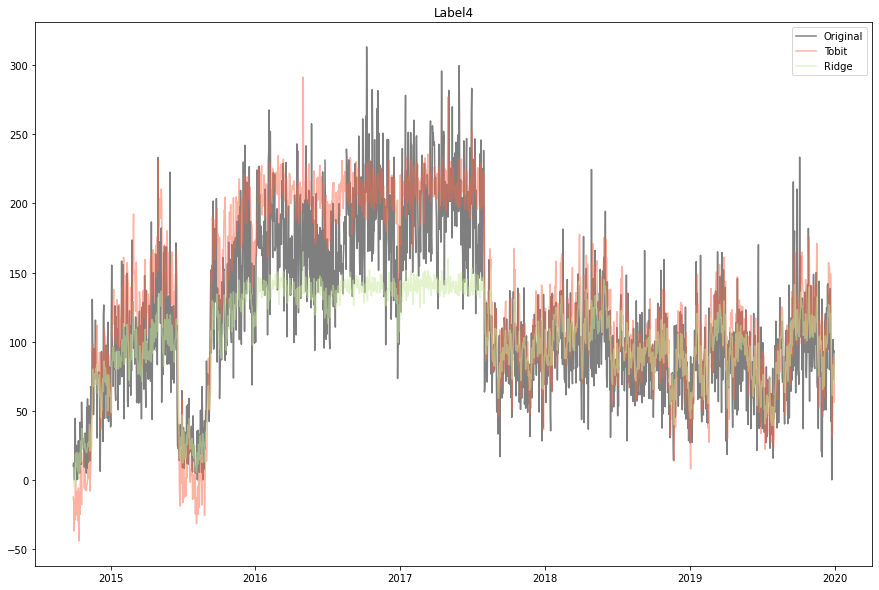

r^2 score: 0.49771480334488816


<IPython.core.display.Javascript object>

RMSE: 41.831041303683584


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

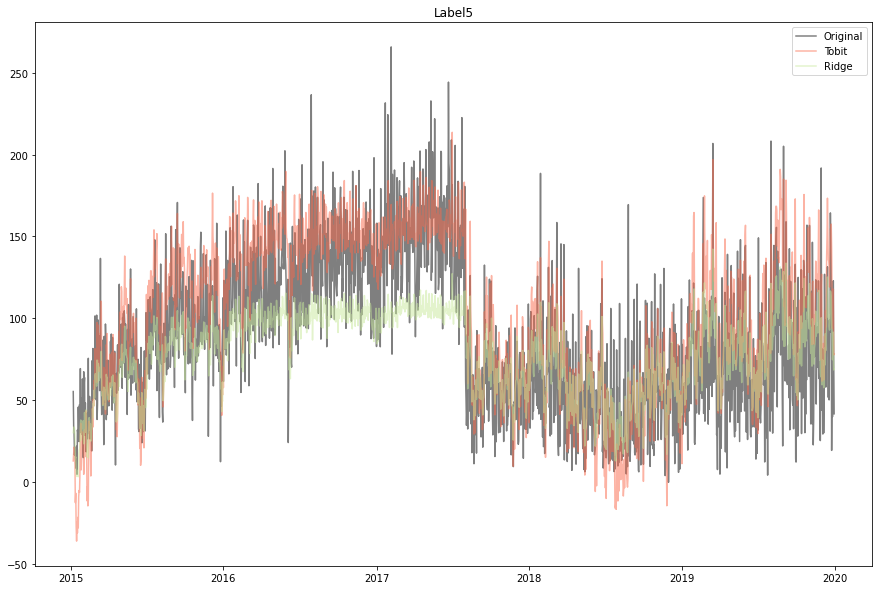

r^2 score: 0.4036987574733948


<IPython.core.display.Javascript object>

RMSE: 35.95838892536546


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

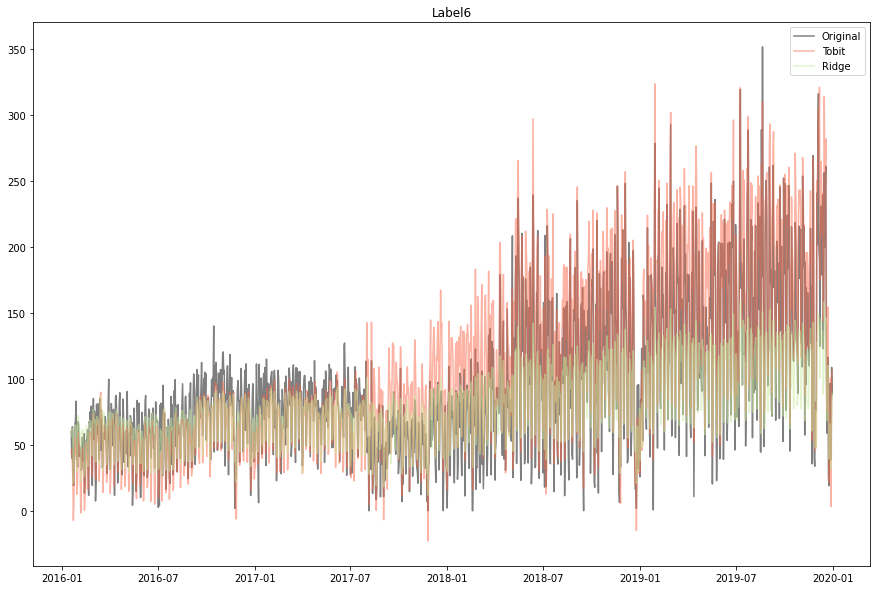

r^2 score: 0.7419715402590779


<IPython.core.display.Javascript object>

RMSE: 29.19031586670318


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

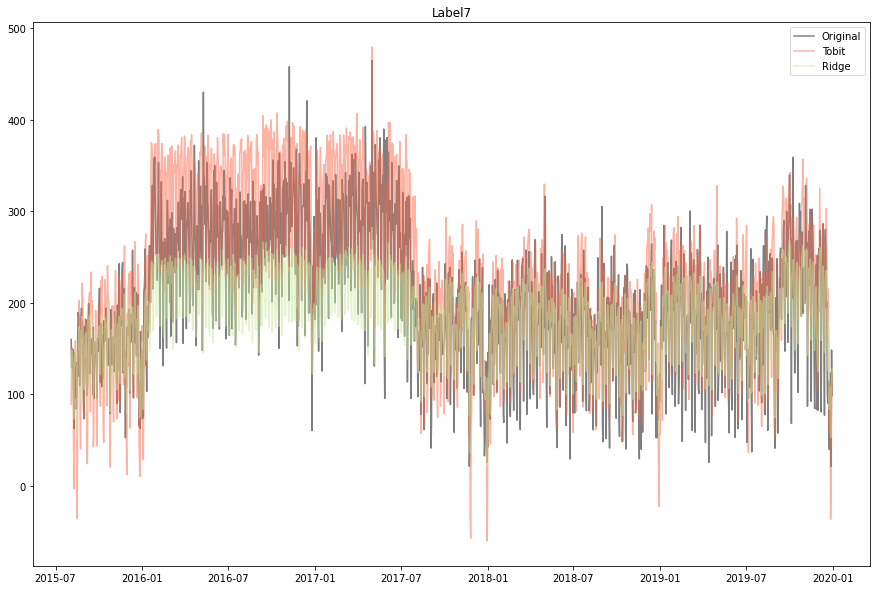

r^2 score: 0.4054350717236903


<IPython.core.display.Javascript object>

RMSE: 59.0524724848631


In [62]:
cmap = plt.cm.bone
rmap = plt.cm.Reds
bmap = plt.cm.YlGn

for label in range(8):
    pred = pd.read_csv(f"data\createdDat\Censorship_scheem\Tobit_0.5_censor_label{label}.csv")
    test_df = df[df["Label"]==label]
    test_df = test_df[-len(pred):]
    plt.figure(figsize=(15,10))
    plt.plot(test_df.index,test_df["Energy (kWh)"], alpha=0.5, label = "Original", color=cmap(0))
    plt.plot(test_df.index,pred["Tobit_pred"], alpha = 0.5, label = "Tobit",color=rmap(0.5))
    plt.plot(test_df.index,pred["Ridge_pred"], alpha=0.5, label = "Ridge",color=bmap(0.3))
    plt.title(f"Label{label}")
    plt.legend()
    plt.show()
    print(f'r^2 score: {r2_score(test_df["Energy (kWh)"],pred["Tobit_pred"])}')
    print(f'RMSE: {np.sqrt(mean_squared_error(test_df["Energy (kWh)"],pred["Tobit_pred"]))}')